In [ ]:
import pandas as pd
df = pd.DataFrame({
    'cerveja': [2,3],
    'total': [20,30]
})
df

,cerveja,total
0,2,20
1,3,30


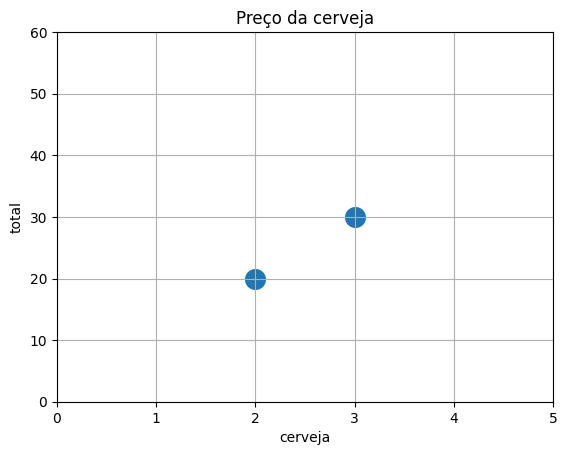

In [ ]:
df.plot(
    kind='scatter',
    x='cerveja',
    y='total',
    ylim=[0,60],
    xlim=[0,5],
    grid=True,
    s=200,
    title='Preço da cerveja'
);

In [ ]:
df

,cerveja,total
0,2,20
1,3,30


In [ ]:
atributo = df['cerveja'].to_frame()
rotulo = df['total'].to_frame()
atributo

,cerveja
0,2
1,3


In [ ]:
rotulo

,total
0,20
1,30


In [ ]:
from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [ ]:
modelo = LinearRegression()
modelo

LinearRegression()

In [ ]:
modelo.fit(atributo, rotulo)

LinearRegression()

In [ ]:
novos_dados = pd.DataFrame({
  'cerveja': [1,4,5]
})
novos_dados

,cerveja
0,1
1,4
2,5


In [ ]:
modelo.predict(novos_dados)

array([[10.],
       [40.],
       [50.]])

In [ ]:
novos_dados['total'] = modelo.predict(novos_dados)
novos_dados

,cerveja,total
0,1,10.0
1,4,40.0
2,5,50.0


In [ ]:
linha = pd.concat([df, novos_dados])
linha

,cerveja,total
0,2,20.0
1,3,30.0
0,1,10.0
1,4,40.0
2,5,50.0


In [ ]:
modelo.coef_, modelo.intercept_.round(2)

(array([[10.]]), array([0.]))

''

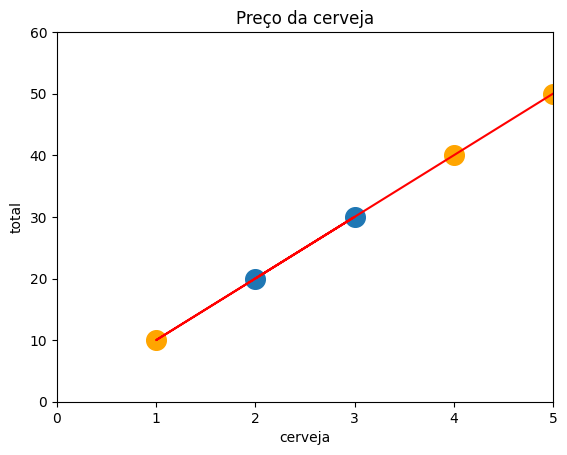

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='cerveja',
    y='total',
    ylim=[0,60],
    xlim=[0,5],
    grid=True,
    s=200,
    title='Preço da cerveja'
)
novos_dados.plot(
    kind='scatter',
    x='cerveja',
    y='total',
    ax=plt.gca(),
    c='orange',
    s=200
)
plt.plot(linha['cerveja'], linha['total'], c='red')
;

# Correlação

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)

df = pd.DataFrame({
    'aleatoria': np.random.randint(0,100, 11),
    'forte_negativa': np.arange(0,11)[::-1],
    'cerveja': np.arange(0,11),
    'total': np.arange(0,11) * 10
})
df

,aleatoria,forte_negativa,cerveja,total
0,44,10,0,0
1,47,9,1,10
2,64,8,2,20
3,67,7,3,30
4,67,6,4,40
5,9,5,5,50
6,83,4,6,60
7,21,3,7,70
8,36,2,8,80
9,87,1,9,90


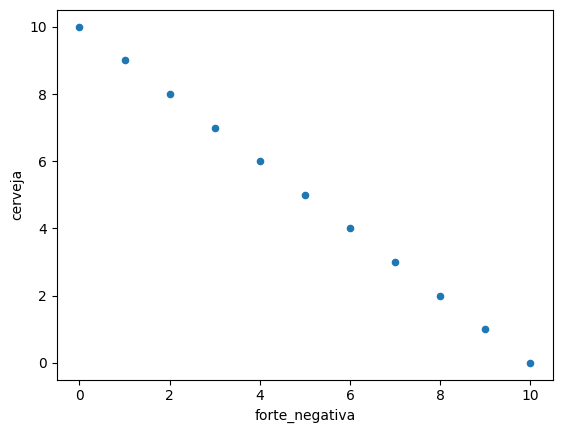

In [ ]:
df.plot(
    kind='scatter',
    x='forte_negativa',
    y='cerveja'
);

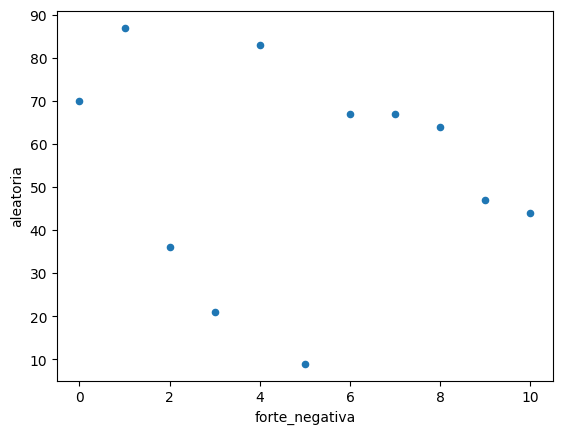

In [ ]:
df.plot(
    kind='scatter',
    x='forte_negativa',
    y='aleatoria'
);

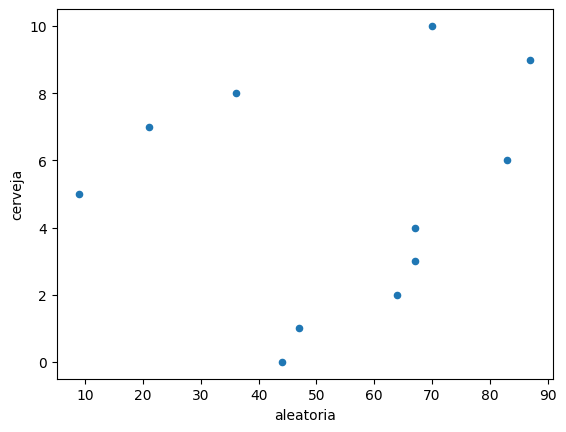

In [ ]:
df.plot(
    kind='scatter',
    x='aleatoria',
    y='cerveja'
);

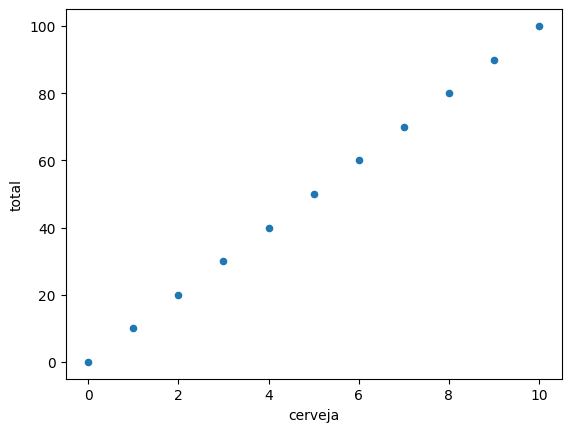

In [ ]:
df.plot(
    kind='scatter',
    x='cerveja',
    y='total'
);

In [ ]:
df.cov()

,aleatoria,forte_negativa,cerveja,total
aleatoria,621.090909,-13.0,13.0,130.0
forte_negativa,-13.000000,11.0,-11.0,-110.0
cerveja,13.000000,-11.0,11.0,110.0
total,130.000000,-110.0,110.0,1100.0


In [ ]:
help(df.corr)

Help on method corr in module pandas.core.frame:

corr(method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1, numeric_only: 'bool | lib.NoDefault' = <no_default>) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid resul

In [ ]:
df.corr()

,aleatoria,forte_negativa,cerveja,total
aleatoria,1.000000,-0.157279,0.157279,0.157279
forte_negativa,-0.157279,1.000000,-1.000000,-1.000000
cerveja,0.157279,-1.000000,1.000000,1.000000
total,0.157279,-1.000000,1.000000,1.000000


''

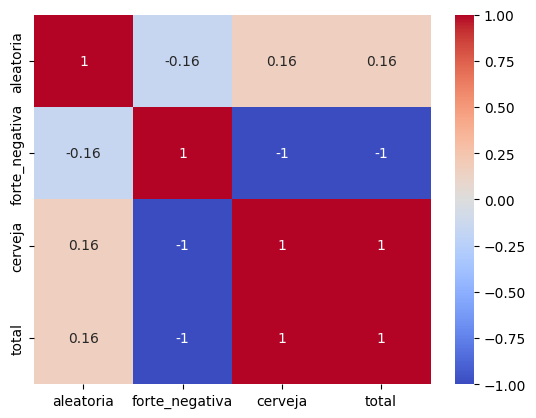

In [ ]:
import seaborn as sns
sns.heatmap(
    df.corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='coolwarm'
)
;

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'cerveja': [3, 2, 0],
    'agua': [0, 0, 1],
    'hamburguer': [0, 1, 1],
    'total': [30, 40, 25]
})
df

,cerveja,agua,hamburguer,total
0,3,0,0,30
1,2,0,1,40
2,0,1,1,25


In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo

LinearRegression()

In [ ]:
atributos = df.drop('total', axis=1)
atributos

,cerveja,agua,hamburguer
0,3,0,0
1,2,0,1
2,0,1,1


In [ ]:
rotulo = df['total'].to_frame()
rotulo

,total
0,30
1,40
2,25


In [ ]:
modelo.fit(atributos, rotulo) #treinamento
modelo

LinearRegression()

In [ ]:
novos_dados = pd.DataFrame({
    'cerveja':[1, 0, 0],
    'agua':[0,1,0],
    'hamburguer':[0, 0, 1]
})
novos_dados

,cerveja,agua,hamburguer
0,1,0,0
1,0,1,0
2,0,0,1


In [ ]:
modelo.predict(novos_dados)

array([[23.33333333],
       [11.66666667],
       [33.33333333]])

In [ ]:
modelo.coef_

array([[ 3.33333333, -8.33333333, 13.33333333]])

'''
y = a0x0 + a1x1 + a2x2 + b
total = valor_cerveja*qtd_verveja + valor_agua*qtd_agua + valor_hamburguer*qtd_hamburguer + entrada

coeficiente(a) = [valor_cerveja, valor_agua, valor_hamburguer]
constante(b) =  entrada
'''

In [ ]:
modelo.intercept_

array([20.])

In [ ]:
df_modelo = atributos*modelo.coef_
df_modelo

,cerveja,agua,hamburguer
0,10.000000,-0.000000,0.000000
1,6.666667,-0.000000,13.333333
2,0.000000,-8.333333,13.333333


In [ ]:
df_modelo['entrada'] = 20
df_modelo

,cerveja,agua,hamburguer,entrada
0,10.000000,-0.000000,0.000000,20
1,6.666667,-0.000000,13.333333,20
2,0.000000,-8.333333,13.333333,20


In [ ]:
df_modelo.sum(axis=1)

0    30.0
1    40.0
2    25.0
dtype: float64

In [ ]:
df

,cerveja,agua,hamburguer,total
0,3,0,0,30
1,2,0,1,40
2,0,1,1,25


In [ ]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [ ]:
modelo = LinearRegression(fit_intercept=False)

In [ ]:
modelo.fit(atributos, rotulo) #treinamento

LinearRegression(fit_intercept=False)

In [ ]:
modelo.predict(novos_dados)

array([[10.],
       [ 5.],
       [20.]])

In [ ]:
novos_dados

,cerveja,agua,hamburguer
0,1,0,0
1,0,1,0
2,0,0,1


In [ ]:
modelo.coef_

array([[10.,  5., 20.]])

In [ ]:
modelo.intercept_

0.0

In [ ]:
df

,cerveja,agua,hamburguer,total
0,3,0,0,30
1,2,0,1,40
2,0,1,1,25


In [ ]:
df_modelo = atributos*modelo.coef_
df_modelo

,cerveja,agua,hamburguer
0,30.0,0.0,0.0
1,20.0,0.0,20.0
2,0.0,5.0,20.0


In [ ]:
df_modelo.sum(axis=1)

0    30.0
1    40.0
2    25.0
dtype: float64

In [ ]:
rotulo

,total
0,30
1,40
2,25


# Ordinary Least Squared (errors)

In [ ]:
np.arange(0,11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'x': np.arange(0, 11),
    'y': np.arange(0, 11) + np.random.randint(0,4, 11)
})
df

,x,y
0,0,0
1,1,1
2,2,2
3,3,5
4,4,5
5,5,7
6,6,9
7,7,10
8,8,10
9,9,9


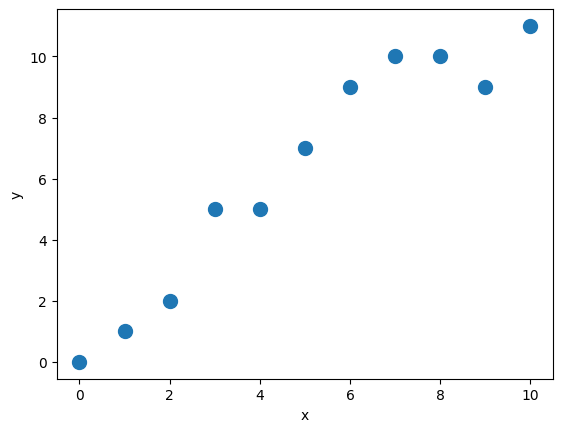

In [ ]:
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
);

In [ ]:
from sklearn.linear_model import LinearRegression
modelo1 = LinearRegression()
modelo2 = LinearRegression(fit_intercept=False)
modelo1, modelo2

(LinearRegression(), LinearRegression(fit_intercept=False))

In [ ]:
atributos = df['x'].to_frame()
atributos

,x
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
rotulo = df['y'].to_frame()
rotulo

,y
0,0
1,1
2,2
3,5
4,5
5,7
6,9
7,10
8,10
9,9


In [ ]:
modelo1.fit(atributos, rotulo) #treinamento

LinearRegression()

In [ ]:
df['modelo1'] = modelo1.predict(atributos)
df

,x,y,modelo1
0,0,0,0.590909
1,1,1,1.727273
2,2,2,2.863636
3,3,5,4.000000
4,4,5,5.136364
5,5,7,6.272727
6,6,9,7.409091
7,7,10,8.545455
8,8,10,9.681818
9,9,9,10.818182


In [ ]:
modelo1.coef_, modelo1.intercept_

(array([[1.13636364]]), array([0.59090909]))

''

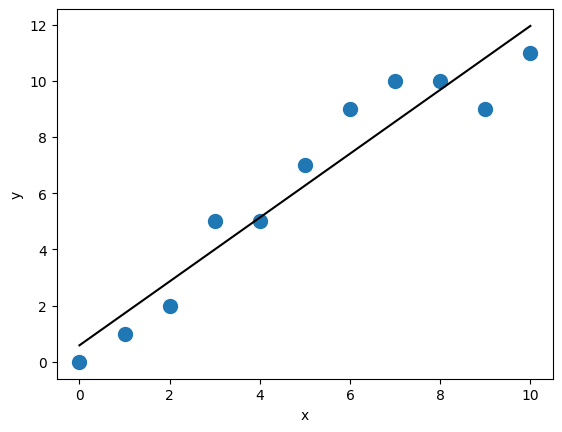

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
)
plt.plot(df['x'], df['modelo1'], c='black')
;

In [ ]:
modelo2

LinearRegression(fit_intercept=False)

In [ ]:
modelo2.fit(atributos, rotulo) #treinamento

LinearRegression(fit_intercept=False)

In [ ]:
df['modelo2'] = modelo2.predict(atributos)
df

,x,y,modelo1,modelo2
0,0,0,0.590909,0.000000
1,1,1,1.727273,1.220779
2,2,2,2.863636,2.441558
3,3,5,4.000000,3.662338
4,4,5,5.136364,4.883117
5,5,7,6.272727,6.103896
6,6,9,7.409091,7.324675
7,7,10,8.545455,8.545455
8,8,10,9.681818,9.766234
9,9,9,10.818182,10.987013


In [ ]:
modelo1.coef_, modelo1.intercept_

(array([[1.13636364]]), array([0.59090909]))

In [ ]:
modelo2.coef_, modelo2.intercept_

(array([[1.22077922]]), 0.0)

''

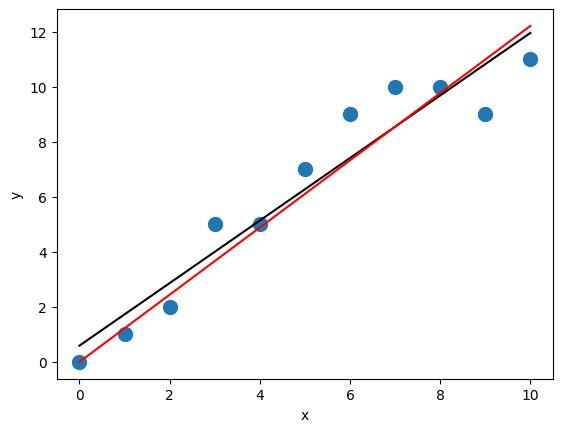

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='x',
    y='y',
    s=100
)
plt.plot(df['x'], df['modelo1'], c='black')
plt.plot(df['x'], df['modelo2'], c='red')
;

In [ ]:
df

,x,y,modelo1,modelo2
0,0,0,0.590909,0.000000
1,1,1,1.727273,1.220779
2,2,2,2.863636,2.441558
3,3,5,4.000000,3.662338
4,4,5,5.136364,4.883117
5,5,7,6.272727,6.103896
6,6,9,7.409091,7.324675
7,7,10,8.545455,8.545455
8,8,10,9.681818,9.766234
9,9,9,10.818182,10.987013


erro = (real - predito)*²*

In [ ]:
df['erro1'] = (df['y'] - df['modelo1'])**2
df

,x,y,modelo1,modelo2,erro1
0,0,0,0.590909,0.000000,0.349174
1,1,1,1.727273,1.220779,0.528926
2,2,2,2.863636,2.441558,0.745868
3,3,5,4.000000,3.662338,1.000000
4,4,5,5.136364,4.883117,0.018595
5,5,7,6.272727,6.103896,0.528926
6,6,9,7.409091,7.324675,2.530992
7,7,10,8.545455,8.545455,2.115702
8,8,10,9.681818,9.766234,0.101240
9,9,9,10.818182,10.987013,3.305785


In [ ]:
df['erro2'] = (df['y'] - df['modelo2'])**2
df

,x,y,modelo1,modelo2,erro1,erro2
0,0,0,0.590909,0.000000,0.349174,0.000000
1,1,1,1.727273,1.220779,0.528926,0.048743
2,2,2,2.863636,2.441558,0.745868,0.194974
3,3,5,4.000000,3.662338,1.000000,1.789341
4,4,5,5.136364,4.883117,0.018595,0.013662
5,5,7,6.272727,6.103896,0.528926,0.803002
6,6,9,7.409091,7.324675,2.530992,2.806713
7,7,10,8.545455,8.545455,2.115702,2.115702
8,8,10,9.681818,9.766234,0.101240,0.054647
9,9,9,10.818182,10.987013,3.305785,3.948221


In [ ]:
df.loc[:, ['erro1', 'erro2']].sum()

erro1    12.136364
erro2    13.233766
dtype: float64

14 < 25
erro1 < erro2
melhor modelo: modelo1

In [ ]:
modelo1

LinearRegression()

# Exercício

https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace Consumo_cerveja.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
df = pd.read_csv(
    '/content/Consumo_cerveja.csv',
    decimal=',',
    parse_dates=True,
    names=['data', 'temp_media', 'temp_min', 'temp_max', 'chuva', 'fds', 'consumo'],
    skiprows=[0]
)
df

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['consumo'] = df['consumo'].astype('float')
df['data'] = pd.to_datetime(df['data'])
df['ano'] = df ['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia_semana'] = df['data'].dt.weekday

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        365 non-null    datetime64[ns]
 1   temp_media  365 non-null    float64       
 2   temp_min    365 non-null    float64       
 3   temp_max    365 non-null    float64       
 4   chuva       365 non-null    float64       
 5   fds         365 non-null    float64       
 6   consumo     365 non-null    float64       
 7   ano         365 non-null    float64       
 8   mes         365 non-null    float64       
 9   dia_semana  365 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 73.6 KB


In [ ]:
df.isnull()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo,ano,mes,dia_semana
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
936,True,True,True,True,True,True,True,True,True,True
937,True,True,True,True,True,True,True,True,True,True
938,True,True,True,True,True,True,True,True,True,True
939,True,True,True,True,True,True,True,True,True,True


In [ ]:
df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        365 non-null    datetime64[ns]
 1   temp_media  365 non-null    float64       
 2   temp_min    365 non-null    float64       
 3   temp_max    365 non-null    float64       
 4   chuva       365 non-null    float64       
 5   fds         365 non-null    float64       
 6   consumo     365 non-null    float64       
 7   ano         365 non-null    float64       
 8   mes         365 non-null    float64       
 9   dia_semana  365 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 31.4 KB


In [ ]:
df.isnull().any()

data          False
temp_media    False
temp_min      False
temp_max      False
chuva         False
fds           False
consumo       False
ano           False
mes           False
dia_semana    False
dtype: bool

In [ ]:
df.duplicated().any()

False

In [ ]:
df.describe()

,temp_media,temp_min,temp_max,chuva,fds,consumo,ano,mes,dia_semana
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.0
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,2015.0,6.526027,3.0
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,0.0,3.452584,2.0
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,2015.0,1.000000,0.0
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,2015.0,4.000000,1.0
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,2015.0,7.000000,3.0
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,2015.0,10.000000,5.0
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,2015.0,12.000000,6.0


In [ ]:
def choveu(chuva):
  if chuva >= 5:
    return 1
  else:
    return 0

In [ ]:
df['choveu'] = df['chuva'].apply(choveu)
df

<ipython-input-651-6cd4fe18ce8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['choveu'] = df['chuva'].apply(choveu)


,data,temp_media,temp_min,temp_max,chuva,fds,consumo,ano,mes,dia_semana,choveu
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,2015.0,1.0,3.0,0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,2015.0,1.0,4.0,0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,2015.0,1.0,5.0,0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,2015.0,1.0,6.0,0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,2015.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,2015.0,12.0,6.0,1
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,2015.0,12.0,0.0,0
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,2015.0,12.0,1.0,1
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,2015.0,12.0,2.0,1


In [ ]:
df = df[[
    'data',
    'ano',
    'mes',
    'dia_semana',
    'fds',
    'temp_min',
    'temp_media',
    'temp_max',
    'chuva',
    'choveu',
    'consumo'
]]
df

,data,ano,mes,dia_semana,fds,temp_min,temp_media,temp_max,chuva,choveu,consumo
0,2015-01-01,2015.0,1.0,3.0,0.0,23.9,27.30,32.5,0.0,0,25.461
1,2015-01-02,2015.0,1.0,4.0,0.0,24.5,27.02,33.5,0.0,0,28.972
2,2015-01-03,2015.0,1.0,5.0,1.0,22.4,24.82,29.9,0.0,0,30.814
3,2015-01-04,2015.0,1.0,6.0,1.0,21.5,23.98,28.6,1.2,0,29.799
4,2015-01-05,2015.0,1.0,0.0,0.0,21.0,23.82,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2015.0,12.0,6.0,1.0,21.1,24.00,28.2,13.6,1,32.307
361,2015-12-28,2015.0,12.0,0.0,0.0,21.1,22.64,26.7,0.0,0,26.095
362,2015-12-29,2015.0,12.0,1.0,0.0,20.3,21.68,24.1,10.3,1,22.309
363,2015-12-30,2015.0,12.0,2.0,0.0,19.3,21.38,22.4,6.3,1,20.467


In [ ]:
df.describe()

,ano,mes,dia_semana,fds,temp_min,temp_media,temp_max,chuva,choveu,consumo
count,365.0,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2015.0,6.526027,3.0,0.284932,17.461370,21.226356,26.611507,5.196712,0.208219,25.401367
std,0.0,3.452584,2.0,0.452001,2.826185,3.180108,4.317366,12.417844,0.406592,4.399143
min,2015.0,1.000000,0.0,0.000000,10.600000,12.900000,14.500000,0.000000,0.000000,14.343000
25%,2015.0,4.000000,1.0,0.000000,15.300000,19.020000,23.800000,0.000000,0.000000,22.008000
50%,2015.0,7.000000,3.0,0.000000,17.900000,21.380000,26.900000,0.000000,0.000000,24.867000
75%,2015.0,10.000000,5.0,1.000000,19.600000,23.280000,29.400000,3.200000,0.000000,28.631000
max,2015.0,12.000000,6.0,1.000000,24.500000,28.860000,36.500000,94.800000,1.000000,37.937000


<Axes: >

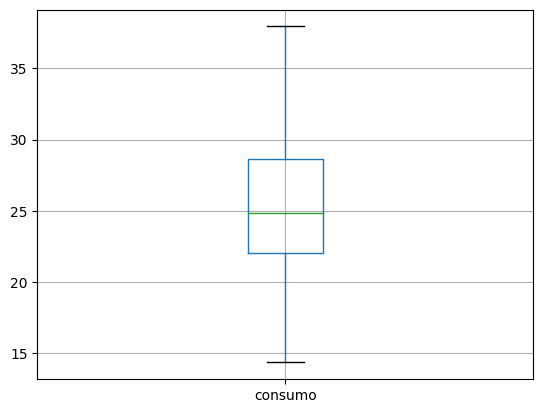

In [ ]:
df['consumo'].to_frame().boxplot()

<Axes: >

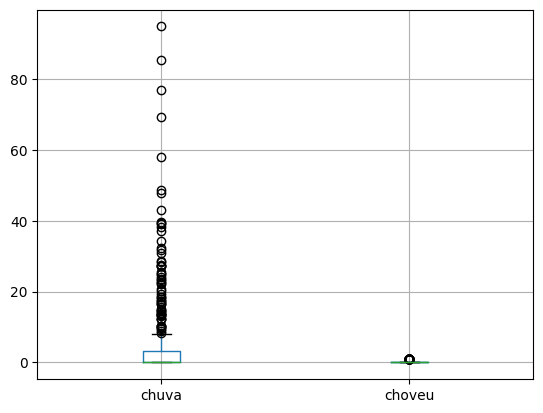

In [ ]:
df[['chuva', 'choveu']].boxplot()

<Axes: >

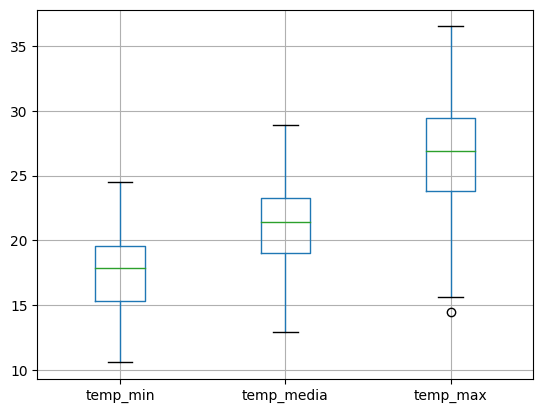

In [ ]:
df[['temp_min', 'temp_media', 'temp_max']].boxplot()

In [ ]:
df = df.drop(['data', 'ano', 'chuva'], axis=1)
df

,mes,dia_semana,fds,temp_min,temp_media,temp_max,choveu,consumo
0,1.0,3.0,0.0,23.9,27.30,32.5,0,25.461
1,1.0,4.0,0.0,24.5,27.02,33.5,0,28.972
2,1.0,5.0,1.0,22.4,24.82,29.9,0,30.814
3,1.0,6.0,1.0,21.5,23.98,28.6,0,29.799
4,1.0,0.0,0.0,21.0,23.82,28.3,0,28.900
...,...,...,...,...,...,...,...,...
360,12.0,6.0,1.0,21.1,24.00,28.2,1,32.307
361,12.0,0.0,0.0,21.1,22.64,26.7,0,26.095
362,12.0,1.0,0.0,20.3,21.68,24.1,1,22.309
363,12.0,2.0,0.0,19.3,21.38,22.4,1,20.467


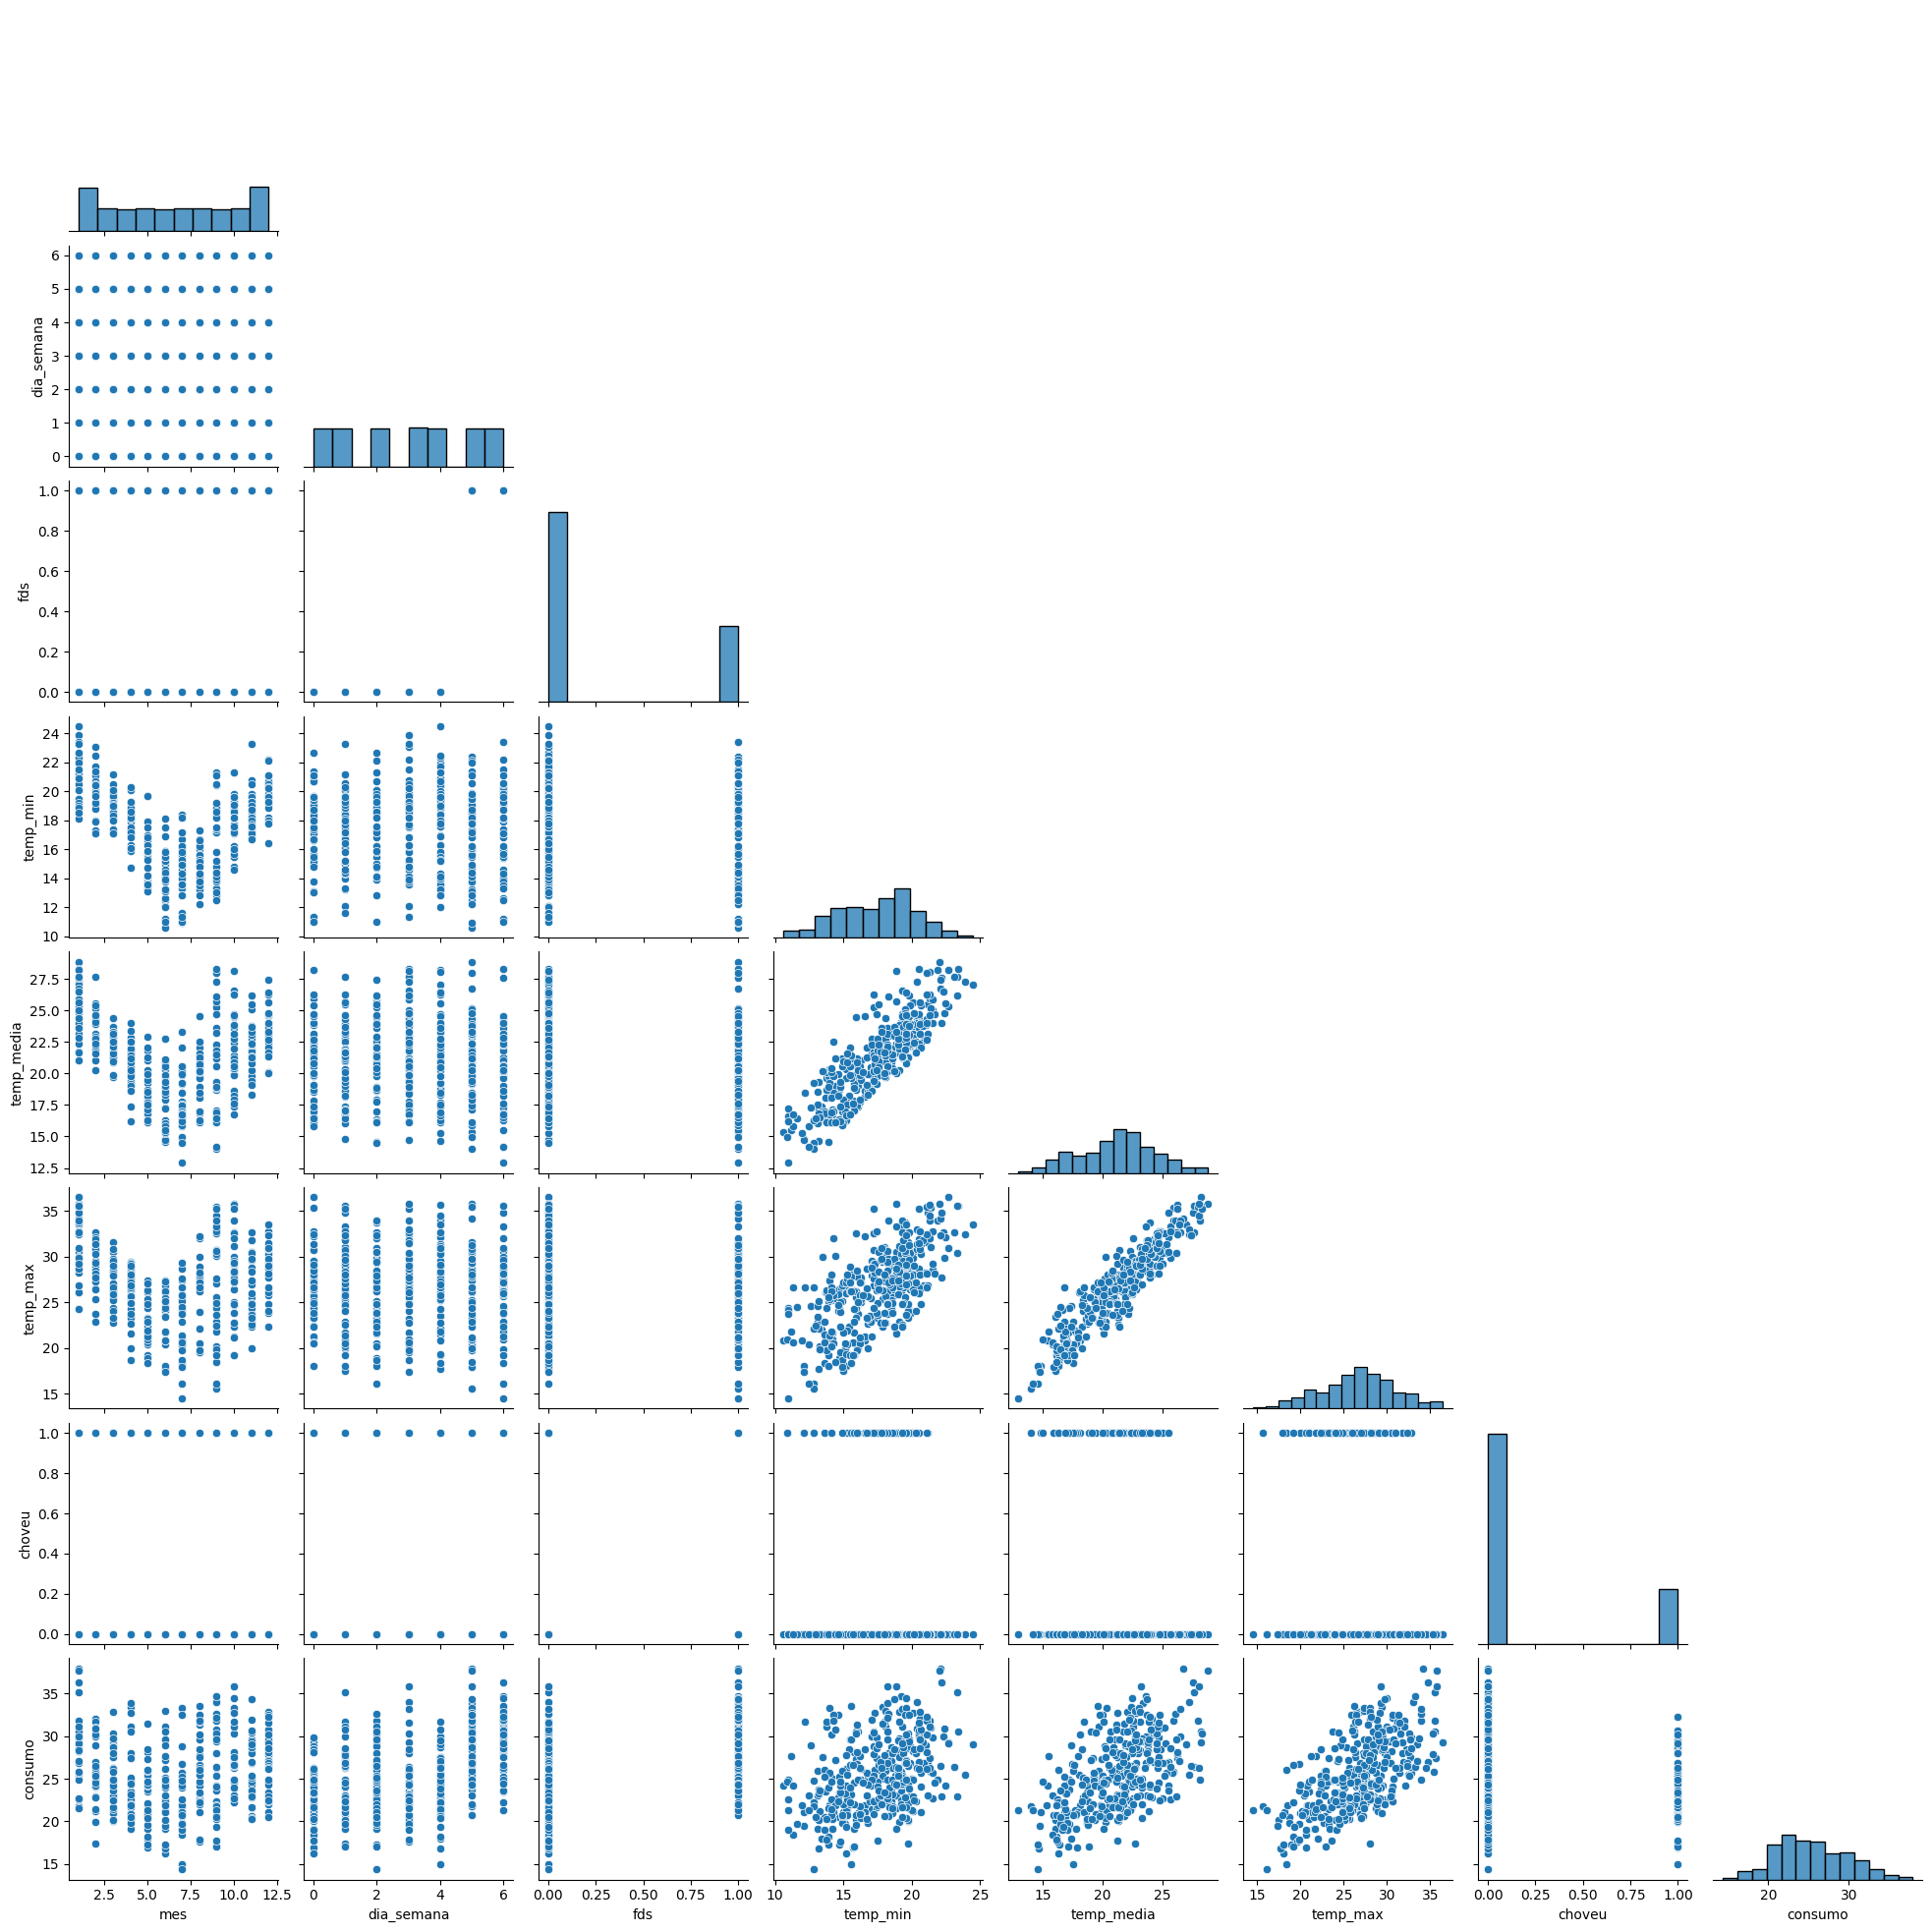

In [ ]:
import seaborn as sns
sns.pairplot(df, corner=True);

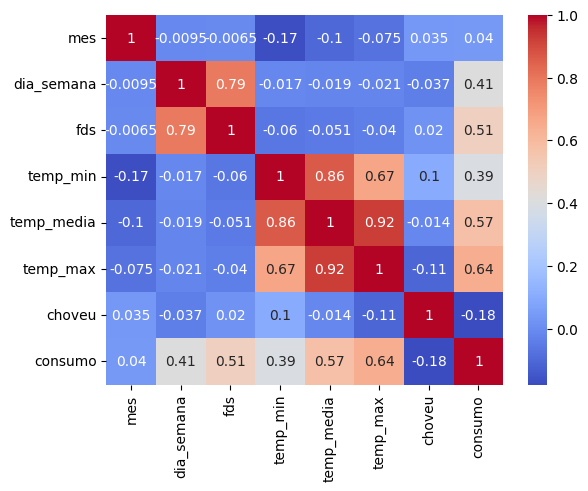

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [ ]:
from sklearn.linear_model import LinearRegression
modelo1 = LinearRegression()
modelo_chuva = LinearRegression(fit_intercept=False)
modelo2 = LinearRegression(fit_intercept=False)
modelo_chuva2 = LinearRegression()

In [ ]:
atributos = df[['fds', 'temp_max']]
atributos_chuva = df[['fds', 'temp_max', 'choveu']]

In [ ]:
rotulo = df['consumo'].to_frame()

In [ ]:
from sklearn.preprocessing import StandardScaler
padronizador = StandardScaler
padronizador

sklearn.preprocessing._data.StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline
modelo1 = Pipeline([
    ('padronizador', StandardScaler()),
    ('regressao_linear', modelo1)
])
modelo_chuva = Pipeline([
    ('padronizador', StandardScaler()),
    ('regressao_linear', modelo_chuva)
])

modelo2= Pipeline([
    ('padronizador', StandardScaler()),
    ('regressao_linear', modelo2)
])

modelo_chuva2 = Pipeline([
    ('padronizador', StandardScaler()),
    ('regressao_linear', modelo_chuva2)
])


In [ ]:
modelo1.fit(atributos, rotulo)
modelo_chuva.fit(atributos_chuva, rotulo)
modelo2.fit(atributos, rotulo)
modelo_chuva2.fit(atributos_chuva, rotulo)

Pipeline(steps=[('padronizador', StandardScaler()),
                ('regressao_linear', LinearRegression())])

In [ ]:
df['modelo1'] = modelo1.fit(atributos, rotulo)
df['modelo_chuva'] = modelo_chuva.fit(atributos_chuva, rotulo)
df['modelo2'] = modelo2.fit(atributos, rotulo)
df['modelo_chuva2'] = modelo_chuva2.fit(atributos_chuva, rotulo)
df

,mes,dia_semana,fds,temp_min,temp_media,temp_max,choveu,consumo,modelo1,modelo_chuva,modelo2,modelo_chuva2
0,1.0,3.0,0.0,23.9,27.30,32.5,0,25.461,"(StandardScaler(), LinearRegression())","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression())"
1,1.0,4.0,0.0,24.5,27.02,33.5,0,28.972,"(StandardScaler(), LinearRegression())","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression())"
2,1.0,5.0,1.0,22.4,24.82,29.9,0,30.814,"(StandardScaler(), LinearRegression())","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression())"
3,1.0,6.0,1.0,21.5,23.98,28.6,0,29.799,"(StandardScaler(), LinearRegression())","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression())"
4,1.0,0.0,0.0,21.0,23.82,28.3,0,28.900,"(StandardScaler(), LinearRegression())","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression())"
...,...,...,...,...,...,...,...,...,...,...,...,...
360,12.0,6.0,1.0,21.1,24.00,28.2,1,32.307,"(StandardScaler(), LinearRegression())","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression())"
361,12.0,0.0,0.0,21.1,22.64,26.7,0,26.095,"(StandardScaler(), LinearRegression())","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression())"
362,12.0,1.0,0.0,20.3,21.68,24.1,1,22.309,"(StandardScaler(), LinearRegression())","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression())"
363,12.0,2.0,0.0,19.3,21.38,22.4,1,20.467,"(StandardScaler(), LinearRegression())","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression(fit_interc...","(StandardScaler(), LinearRegression())"


In [ ]:
df['modelo1'] = modelo1.predict(atributos)
df['modelo_chuva'] = modelo_chuva.predict(atributos_chuva)
df['modelo2'] = modelo2.predict(atributos)
df['modelo_chuva2'] = modelo_chuva2.predict(atributos_chuva)
df

,mes,dia_semana,fds,temp_min,temp_media,temp_max,choveu,consumo,modelo1,modelo_chuva,modelo2,modelo_chuva2
0,1.0,3.0,0.0,23.9,27.30,32.5,0,25.461,27.908811,2.696265,2.507444,28.097632
1,1.0,4.0,0.0,24.5,27.02,33.5,0,28.972,28.585509,3.360041,3.184142,28.761408
2,1.0,5.0,1.0,22.4,24.82,29.9,0,30.814,31.334109,6.173663,5.932742,31.575030
3,1.0,6.0,1.0,21.5,23.98,28.6,0,29.799,30.454401,5.310754,5.053034,30.712121
4,1.0,0.0,0.0,21.0,23.82,28.3,0,28.900,25.066679,-0.091594,-0.334688,25.309773
...,...,...,...,...,...,...,...,...,...,...,...,...
360,12.0,6.0,1.0,21.1,24.00,28.2,1,32.307,30.183722,3.747645,4.782355,29.149012
361,12.0,0.0,0.0,21.1,22.64,26.7,0,26.095,23.983962,-1.153635,-1.417405,24.247732
362,12.0,1.0,0.0,20.3,21.68,24.1,1,22.309,22.224547,-4.177052,-3.176820,21.224315
363,12.0,2.0,0.0,19.3,21.38,22.4,1,20.467,21.074160,-5.305471,-4.327207,20.095896


In [ ]:
df['erro_modelo1'] = (df['consumo'] - df['modelo1'])**2
df['erro_modelo_chuva'] = (df['consumo'] - df['modelo_chuva'])**2
df['erro_modelo2'] = (df['consumo'] - df['modelo2'])**2
df['erro_modelo_chuva2'] = (df['consumo'] - df['modelo_chuva2'])**2
df

,mes,dia_semana,fds,temp_min,temp_media,temp_max,choveu,consumo,modelo1,modelo_chuva,modelo2,modelo_chuva2,erro_modelo1,erro_modelo_chuva,erro_modelo2,erro_modelo_chuva2
0,1.0,3.0,0.0,23.9,27.30,32.5,0,25.461,27.908811,2.696265,2.507444,28.097632,5.991780,518.233151,526.865722,6.951830
1,1.0,4.0,0.0,24.5,27.02,33.5,0,28.972,28.585509,3.360041,3.184142,28.761408,0.149375,655.972435,665.013602,0.044349
2,1.0,5.0,1.0,22.4,24.82,29.9,0,30.814,31.334109,6.173663,5.932742,31.575030,0.270513,607.146202,619.077013,0.579167
3,1.0,6.0,1.0,21.5,23.98,28.6,0,29.799,30.454401,5.310754,5.053034,30.712121,0.429551,599.674175,612.362824,0.833791
4,1.0,0.0,0.0,21.0,23.82,28.3,0,28.900,25.066679,-0.091594,-0.334688,25.309773,14.694348,840.512518,854.666973,12.889728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12.0,6.0,1.0,21.1,24.00,28.2,1,32.307,30.183722,3.747645,4.782355,29.149012,4.508309,815.636739,757.606086,9.972885
361,12.0,0.0,0.0,21.1,22.64,26.7,0,26.095,23.983962,-1.153635,-1.417405,24.247732,4.456480,742.488135,756.932419,3.412400
362,12.0,1.0,0.0,20.3,21.68,24.1,1,22.309,22.224547,-4.177052,-3.176820,21.224315,0.007132,701.510932,649.527017,1.176541
363,12.0,2.0,0.0,19.3,21.38,22.4,1,20.467,21.074160,-5.305471,-4.327207,20.095896,0.368644,664.220251,614.752686,0.137718


In [ ]:
df.iloc[:, -4:].sum()


erro_modelo1            2138.963221
erro_modelo_chuva     237547.564214
erro_modelo2          237647.713103
erro_modelo_chuva2      2038.814332
dtype: float64

In [ ]:
modelo1.steps[1][1].coef_, modelo1.steps[1][1].intercept_

(array([[2.34028498, 2.91754842]]), array([25.40136712]))

In [ ]:
modelo_chuva2.steps[1][1].coef_, modelo_chuva2.steps[1][1].intercept_

(array([[ 2.34863685,  2.8618353 , -0.52686971]]), array([25.40136712]))

In [ ]:
modelo_chuva2